In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c7e94484-348c-4695-9526-5e70bd45d2ba',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-03T19:24:22.863Z', 'error_code': 0, 'error_message': None, 'elapsed': 54, 'credit_count': 1, 'notice': None, 'total_count': 9966}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9598, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# normalizes the data and make it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.908421e+07,1.908421e+07,NaN,1,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,19239.535028,1.493819e+10,-23.3051,0.140968,-0.424435,-9.519217,-34.868315,-51.633220,-57.908934,3.671712e+11,42.2616,4.040302e+11,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.213974e+08,1.213974e+08,NaN,2,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1060.194663,7.775902e+09,-29.5525,0.129219,-0.987975,-13.352956,-39.453280,-64.067860,-69.430152,1.287048e+11,14.8140,1.287048e+11,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
2,825,Tether,USDT,tether,35535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.623032e+10,6.860737e+10,NaN,3,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.999103,2.583322e+10,-24.1703,0.002458,0.009313,-0.037338,-0.010222,-0.086931,-0.117092,6.617089e+10,7.6163,6.854581e+10,NaN,2022-07-03T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 19:24:58.632832
3,3408,USD Coin,USDC,usd-coin,4744,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1.000116,3.607369e+09,-9.4172,-0.001014,-0.025078,0.009000,-0.017369,0.006679,-0.007327,5.580910e+10,6.4266,5.580910e+10,NaN,2022-07-03T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 19:24:58.632832
4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,216.876241,6.822071e+08,-15.8916,0.253609,-0.724742,-8.748042,-26.880540,-45.982303,-50.775487,3.541090e+10,4.0777,3.580990e+10,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
5,4687,Binance USD,BUSD,binance-usd,3954,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,1.000324,3.582895e+09,-11.6632,-0.154505,0.076374,-0.056637,-0.009166,0.152290,0.136551,1.755292e+10,2.0203,1.755292e+10,NaN,2022-07-03T19:23:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-03 19:24:58.632832
6,52,XRP,XRP,xrp,749,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,0.320721,6.490831e+08,-0.6074,1.131311,1.577635,-11.727178,-17.106164,-50.187702,-60.818242,1.550463e+10,1.7846,3.207206e+10,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
7,2010,Cardano,ADA,cardano,504,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,8,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.452417,4.192652e+08,-15.7473,0.462635,-0.419430,-9.718821,-18.928208,-47.761238,-61.698232,1.526410e+10,1.7569,2.035875e+10,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
8,5426,Solana,SOL,solana,344,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.434167e+08,5.116169e+08,NaN,9,NaN,Na

In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c7e94484-348c-4695-9526-5e70bd45d2ba',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # normalizes the data and make it all pretty in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

# If you want to create a csv and append data to it
#    df = pd.json_normalize(data['data'])
#    df['timestamp'] = pd.to_datetime('now')
#    df
   
#    if not os.path.isfile(r'C:\Users\hp\CoinMarketCapAPI.csv'):
#        df.to_csv(r'C:\Users\hp\CoinMarketCapAPI.csv', header = 'column_names')
#    else:
#        df.to_csv(r'C:\Users\hp\CoinMarketCapAPI.csv', mode = 'a', header = False)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
import os
from time import time
from time import sleep

for i in range(250):
    api_runner()
    print('Api Runner completed')
    sleep(120) # sleep for 2 minutes
exit()

Api Runner completed
Api Runner completed
Api Runner completed
Api Runner completed
Api Runner completed


KeyboardInterrupt: 

In [26]:
# Read data from CSV created above
#df_ran = pd.read_csv(r'C:\Users\hp\CoinMarketCapAPI.csv')
#df_ran

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.908415e+07,1.908415e+07,NaN,1,NaN,NaN,NaN,2022-07-03T17:33:00.000Z,19129.947373,1.501145e+10,-24.4830,0.241540,-0.947566,-9.858439,-35.196065,-50.910223,-58.186262,3.650788e+11,42.2361,4.017289e+11,NaN,2022-07-03T17:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 17:34:07.185477
1,1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.213963e+08,1.213963e+08,NaN,2,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,1055.478573,8.080883e+09,-28.6758,0.020425,-0.673579,-13.400040,-39.833139,-62.906024,-69.456026,1.281312e+11,14.8235,1.281312e+11,NaN,2022-07-03T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 17:34:07.185477
2,2,825,Tether,USDT,tether,35535,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.623032e+10,6.860737e+10,NaN,3,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,0.999074,2.620138e+10,-24.3857,0.000486,0.008895,-0.042222,-0.012384,-0.096134,-0.130421,6.616896e+10,7.6551,6.854381e+10,NaN,2022-07-03T17:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 17:34:07.185477
3,3,3408,USD Coin,USDC,usd-coin,4744,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,1.000077,3.651990e+09,-9.9643,-0.010576,-0.051971,0.001771,-0.003047,0.040476,0.065860,5.580689e+10,6.4565,5.580689e+10,NaN,2022-07-03T17:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 17:34:07.185477
4,4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,215.648441,6.960744e+08,-14.6010,-0.054065,-0.921416,-9.074312,-27.345845,-44.894027,-50.997238,3.521043e+10,4.0736,3.560717e+10,NaN,2022-07-03T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 17:34:07.185477
5,5,4687,Binance USD,BUSD,binance-usd,3954,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,0.999733,3.638389e+09,-11.8261,-0.037628,-0.035472,0.036256,-0.157859,0.028854,-0.158836,1.754254e+10,2.0295,1.754254e+10,NaN,2022-07-03T17:32:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-03 17:34:07.185477
6,6,52,XRP,XRP,xrp,749,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,0.314893,6.259769e+08,-7.2665,0.430285,-0.114151,-13.130346,-18.488961,-48.836079,-61.683814,1.522292e+10,1.7611,3.148932e+10,NaN,2022-07-03T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 17:34:07.185477
7,7,2010,Cardano,ADA,cardano,504,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.375257e+10,3.451285e+10,NaN,8,NaN,NaN,NaN,2022-07-03T17:32:00.000Z,0.448701,4.317948e+08,-13.0245,-0.020012,-0.731011,-10.611356,-19.258527,-46.031397,-62.278096,1.514482e+10,1.7521,2.019156e+10,NaN,2022-07-03T17:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 17:34:07.185477
8,8,5426,Solana,SOL,solana,344,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.434

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.908421e+07,1.908421e+07,NaN,1,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,19239.535028,1.493819e+10,-23.3051,0.140968,-0.424435,-9.519217,-34.868315,-51.633220,-57.908934,3.671712e+11,42.2616,4.040302e+11,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.213974e+08,1.213974e+08,NaN,2,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1060.194663,7.775902e+09,-29.5525,0.129219,-0.987975,-13.352956,-39.453280,-64.067860,-69.430152,1.287048e+11,14.8140,1.287048e+11,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
2,825,Tether,USDT,tether,35535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.623032e+10,6.860737e+10,NaN,3,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.999103,2.583322e+10,-24.1703,0.002458,0.009313,-0.037338,-0.010222,-0.086931,-0.117092,6.617089e+10,7.6163,6.854581e+10,NaN,2022-07-03T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 19:24:58.632832
3,3408,USD Coin,USDC,usd-coin,4744,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.580261e+10,5.580261e+10,NaN,4,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1.000116,3.607369e+09,-9.4172,-0.001014,-0.025078,0.009000,-0.017369,0.006679,-0.007327,5.580910e+10,6.4266,5.580910e+10,NaN,2022-07-03T19:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 19:24:58.632832
4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,216.876241,6.822071e+08,-15.8916,0.253609,-0.724742,-8.748042,-26.880540,-45.982303,-50.775487,3.541090e+10,4.0777,3.580990e+10,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
5,4687,Binance USD,BUSD,binance-usd,3954,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.754722e+10,1.754722e+10,NaN,6,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,1.000324,3.582895e+09,-11.6632,-0.154505,0.076374,-0.056637,-0.009166,0.152290,0.136551,1.755292e+10,2.0203,1.755292e+10,NaN,2022-07-03T19:23:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-07-03 19:24:58.632832
6,52,XRP,XRP,xrp,749,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,7,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,0.320721,6.490831e+08,-0.6074,1.131311,1.577635,-11.727178,-17.106164,-50.187702,-60.818242,1.550463e+10,1.7846,3.207206e+10,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
7,2010,Cardano,ADA,cardano,504,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,8,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.452417,4.192652e+08,-15.7473,0.462635,-0.419430,-9.718821,-18.928208,-47.761238,-61.698232,1.526410e+10,1.7569,2.035875e+10,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
8,5426,Solana,SOL,solana,344,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.434167e+08,5.116169e+08,NaN,9,NaN,Na

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19084206.00000,19084206.00000,NaN,1,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,19239.53503,14938189260.42059,-23.30510,0.14097,-0.42444,-9.51922,-34.86832,-51.63322,-57.90893,367171249814.41479,42.26160,404030235583.42999,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121397373.81150,121397373.81150,NaN,2,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1060.19466,7775901751.33558,-29.55250,0.12922,-0.98798,-13.35296,-39.45328,-64.06786,-69.43015,128704847786.59439,14.81400,128704847786.59000,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
2,825,Tether,USDT,tether,35535,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66230318609.98427,68607365339.33806,NaN,3,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.99910,25833220422.77307,-24.17030,0.00246,0.00931,-0.03734,-0.01022,-0.08693,-0.11709,66170892203.82697,7.61630,68545806083.04000,NaN,2022-07-03T19:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 19:24:58.632832
3,3408,USD Coin,USDC,usd-coin,4744,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,1.00012,3607369096.43017,-9.41720,-0.00101,-0.02508,0.00900,-0.01737,0.00668,-0.00733,55809101009.47413,6.42660,55809101009.47000,NaN,2022-07-03T19:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 19:24:58.632832
4,1839,BNB,BNB,bnb,986,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,216.87624,682207144.40548,-15.89160,0.25361,-0.72474,-8.74804,-26.88054,-45.98230,-50.77549,35410896444.29018,4.07770,35809902178.96000,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
5,4687,Binance USD,BUSD,binance-usd,3954,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17547224379.45926,17547224379.45926,NaN,6,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,1.00032,3582894808.45373,-11.66320,-0.15451,0.07637,-0.05664,-0.00917,0.15229,0.13655,17552918071.81180,2.02030,17552918071.81000,NaN,2022-07-03T19:23:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-03 19:24:58.632832
6,52,XRP,XRP,xrp,749,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,7,NaN,NaN,NaN,2022-07-03T19:23:00.000Z,0.32072,649083112.54203,-0.60740,1.13131,1.57764,-11.72718,-17.10616,-50.18770,-60.81824,15504627661.36202,1.78460,32072058427.08000,NaN,2022-07-03T19:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 19:24:58.632832
7,2010,Cardano,ADA,cardano,504,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,8,NaN,NaN,NaN,2022-07-03T19:22:00.000Z,0.45242,419265221.83877,-15.74730,0.46263,-0.41943,-9.71882,-18.92821,-47.76124,-61.69823,15264098476.68455,1.75690,20358749545.21000,NaN,2022-07-03T19:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-0

In [28]:
# Now let's look at the coin trends over time
col = ['name','quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']
df3 = df[col].tail(20)
df3

,name,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
0,Bitcoin,0.27017,-0.30205,-9.50322,-34.78214,-51.61994,-57.89887
1,Ethereum,0.21337,-0.65263,-13.35791,-39.34398,-64.00762,-69.43155
2,Tether,0.00037,0.01276,-0.04396,-0.00982,-0.09211,-0.12093
3,USD Coin,-0.00894,-0.03642,-0.00370,0.00026,0.00184,0.03095
4,BNB,0.33944,-0.41273,-8.75454,-26.79837,-45.95088,-50.76685
5,Binance USD,-0.13496,-0.07406,0.07816,-0.04080,-0.12106,-0.06981
6,XRP,1.19648,1.79368,-11.80450,-17.01930,-50.10886,-60.81263
7,Cardano,0.59604,-0.11059,-9.69248,-18.74762,-47.76875,-61.70924
8,Solana,0.51928,-0.94065,-18.93805,-14.16471,-64.03233,-74.70333
9,Dogecoin,0.50865,-0.86255,-9.50723,-17.61733,-50.70227,-54.23659


In [13]:
df3.set_index('name', inplace=True)
df3
#df3.reset_index(inplace=True)
df4 = df3.stack().to_frame(name='values')
df4

values
name                                                
Bitcoin         quote.USD.percent_change_1h     0.27
                quote.USD.percent_change_24h   -0.30
                quote.USD.percent_change_7d    -9.50
                quote.USD.percent_change_30d  -34.78
                quote.USD.percent_change_60d  -51.62
                quote.USD.percent_change_90d  -57.90
Ethereum        quote.USD.percent_change_1h     0.21
                quote.USD.percent_change_24h   -0.65
                quote.USD.percent_change_7d   -13.36
                quote.USD.percent_change_30d  -39.34
                quote.USD.percent_change_60d  -64.01
                quote.USD.percent_change_90d  -69.43
Tether          quote.USD.percent_change_1h     0.00
                quote.USD.percent_change_24h    0.01
                quote.USD.percent_change_7d    -0.04
                quote.USD.percent_change_30d   -0.01
                quote.USD.percent_change_60d   -0.09
                quote.USD.percent_change_90d   -0.12
USD Coin        quote.USD.percent_change_1h    -0.01
                quote.USD.percent_change_24h   -0.04
                quote.USD.percent_change_7d    -0.00
                quote.USD.percent_change_30d    0.00
                quote.USD.percent_change_60d    0.00
                quote.USD.percent_change_90d    0.03
BNB             quote.USD.percent_change_1h     0.34
                quote.USD.percent_change_24h   -0.41
                quote.USD.percent_change_7d    -8.75
                quote.USD.percent_change_30d  -26.80
                quote.USD.percent_change_60d  -45.95
                quote.USD.percent_change_90d  -50.77
Binance USD     quote.USD.percent_change_1h    -0.13
                quote.USD.percent_change_24h   -0.07
                quote.USD.percent_change_7d     0.08
                quote.USD.percent_change_30d   -0.04
                quote.USD.percent_change_60d   -0.12
                quote.USD.percent_change_90d   -0.07
XRP             quote.USD.percent_change_1h     1.20
                quote.USD.percent_change_24h    1.79
                quote.USD.percent_change_7d   -11.80
                quote.USD.percent_change_30d  -17.02
                quote.USD.percent_change_60d  -50.11
                quote.USD.percent_change_90d  -60.81
Cardano         quote.USD.percent_change_1h     0.60
                quote.USD.percent_change_24h   -0.11
                quote.USD.percent_change_7d    -9.69
                quote.USD.percent_change_30d  -18.75
                quote.USD.percent_change_60d  -47.77
                quote.USD.percent_change_90d  -61.71
Solana          quote.USD.percent_change_1h     0.52
                quote.USD.percent_change_24h   -0.94
                quote.USD.percent_change_7d   -18.94
                quote.USD.percent_change_30d  -14.16
                quote.USD.percent_change_60d  -64.03
                quote.USD.percent_change_90d  -74.70
Dogecoin        quote.USD.percent_change_1h     0.51
                quote.USD.percent_change_24h   -0.86
                quote.USD.percent_change_7d    -9.51
                quote.USD.percent_change_30d  -17.62
                quote.USD.percent_change_60d  -50.70
                quote.USD.percent_change_90d  -54.24
Dai             quote.USD.percent_change_1h     0.02
                quote.USD.percent_change_24h   -0.02
                quote.USD.percent_change_7d     0.03
                quote.USD.percent_change_30d    0.10
                quote.USD.percent_change_60d    0.02
                quote.USD.percent_change_90d    0.10
Polkadot        quote.USD.percent_change_1h     1.08
                quote.USD.percent_change_24h   -0.41
                quote.USD.percent_change_7d   -15.22
                quote.USD.percent_change_30d  -27.23
                quote.USD.percent_change_60d  -57.47
                quote.USD.percent_change_90d  -69.38
TRON            quote.USD.percent_change_1h     0.63
                quote.USD.percent_change_24h   -0.60
                qu

In [14]:
type(df4)

pandas.core.frame.DataFrame

In [15]:
df4.count()

values    120
dtype: int64

In [16]:
df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.27
1,Bitcoin,quote.USD.percent_change_24h,-0.30
2,Bitcoin,quote.USD.percent_change_7d,-9.50
3,Bitcoin,quote.USD.percent_change_30d,-34.78
4,Bitcoin,quote.USD.percent_change_60d,-51.62
5,Bitcoin,quote.USD.percent_change_90d,-57.90
6,Ethereum,quote.USD.percent_change_1h,0.21
7,Ethereum,quote.USD.percent_change_24h,-0.65
8,Ethereum,quote.USD.percent_change_7d,-13.36
9,Ethereum,quote.USD.percent_change_30d,-39.34


In [17]:
df5.rename(columns={'level_1':'percent_change'}, inplace = True)

In [18]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,0.27
1,Bitcoin,24h,-0.30
2,Bitcoin,7d,-9.50
3,Bitcoin,30d,-34.78
4,Bitcoin,60d,-51.62
5,Bitcoin,90d,-57.90
6,Ethereum,1h,0.21
7,Ethereum,24h,-0.65
8,Ethereum,7d,-13.36
9,Ethereum,30d,-39.34


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

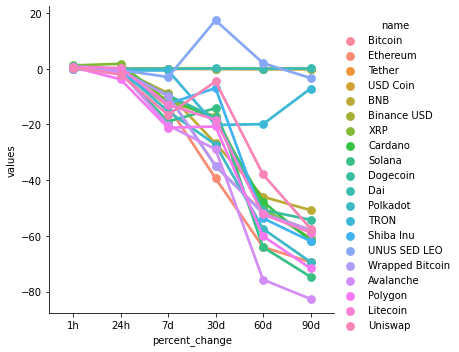

In [20]:
sns.catplot(x='percent_change', y='values', hue = 'name', data=df5, kind='point')

In [93]:
df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query("name=='Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,19239.53503,2022-07-03 19:24:58.632832
0,Bitcoin,19239.53503,2022-07-03 19:25:15.227427
0,Bitcoin,19242.07913,2022-07-03 19:26:17.384555
0,Bitcoin,19242.07913,2022-07-03 19:27:18.632580
0,Bitcoin,19253.97527,2022-07-03 19:28:20.163561
0,Bitcoin,19253.97527,2022-07-03 19:29:23.201340
0,Bitcoin,19290.46877,2022-07-03 19:42:47.026617
0,Bitcoin,19294.90817,2022-07-03 19:44:47.569658
0,Bitcoin,19309.71912,2022-07-03 19:46:49.391479
0,Bitcoin,19363.20111,2022-07-03 19:48:50.563508


In [94]:
df6.reset_index(inplace=True)
df6.drop(['index'], axis = 1, inplace=True)
df6

,name,quote.USD.price,timestamp
0,Bitcoin,19239.53503,2022-07-03 19:24:58.632832
1,Bitcoin,19239.53503,2022-07-03 19:25:15.227427
2,Bitcoin,19242.07913,2022-07-03 19:26:17.384555
3,Bitcoin,19242.07913,2022-07-03 19:27:18.632580
4,Bitcoin,19253.97527,2022-07-03 19:28:20.163561
5,Bitcoin,19253.97527,2022-07-03 19:29:23.201340
6,Bitcoin,19290.46877,2022-07-03 19:42:47.026617
7,Bitcoin,19294.90817,2022-07-03 19:44:47.569658
8,Bitcoin,19309.71912,2022-07-03 19:46:49.391479
9,Bitcoin,19363.20111,2022-07-03 19:48:50.563508


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

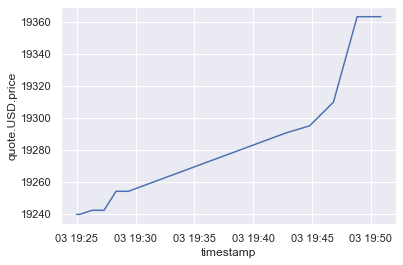

In [95]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df6)